Juan Carlos de la Torre Felix 1932878
Ian Carlos Salas Rincón 1945113
Edna Valeria Degollado García 2035693
Jacobo Fabián Nevaréz Hernández 2077409
Rafael Díaz García 2082496

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ednadegollado","key":"bc71353e89e869c728cf9587c7e8549a"}'}

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohamedchahed/dog-breeds

 89% 73.0M/82.3M [00:01<00:00, 50.5MB/s]
100% 82.3M/82.3M [00:01<00:00, 52.9MB/s]


In [ ]:
import zipfile

zip_file_path = '/content/dog-breeds.zip'

extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
imagenes = []
etiquetas = []

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/dog-breeds'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (28,28), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

In [ ]:
etiquetas = np.array(etiquetas)

In [ ]:
len(etiquetas)

541

In [ ]:
images = np.array(imagenes)

In [ ]:
len(images)

541

In [ ]:
np.shape(images)

(541, 28, 28, 3)

In [ ]:
len(etiquetas)

541

In [ ]:
etiquetas[-1]

7

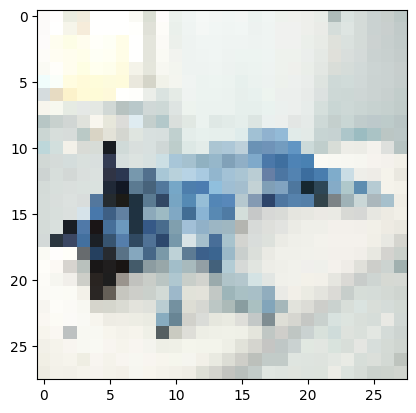

In [ ]:
plt.imshow(imagenes[10])

In [ ]:
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [ ]:
images_train, images_test, labels_train, labels_test = train_test_split(images, etiquetas, test_size=0.2, random_state=42)

In [ ]:
train_images, test_images = images_train / 255.0, images_test / 255.0

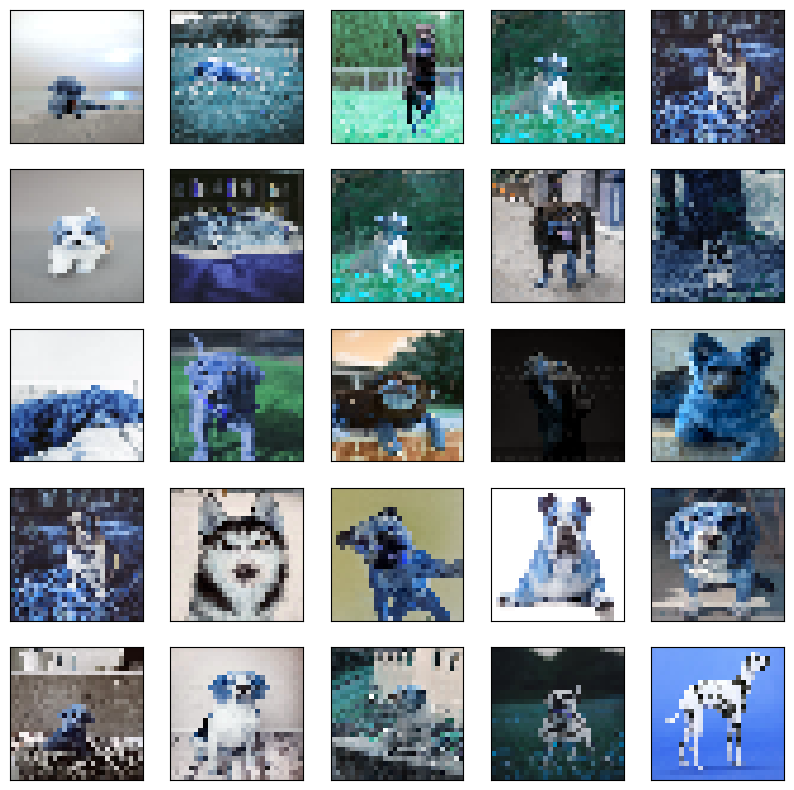

In [ ]:
class_names = ['beagle', 'bulldog', 'dalmatian', 'german-shepherd', 'husky',
               'labrador-retriever', 'poodle', 'rotweiler']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, labels_train, epochs=10,
                    validation_data=(test_images, labels_test))

Epoch 1/10
14/14 [==============================] - 2s 49ms/step - loss: 1.1261 - accuracy: 0.6134 - val_loss: 1.4310 - val_accuracy: 0.4312
Epoch 2/10
14/14 [==============================] - 1s 39ms/step - loss: 1.0223 - accuracy: 0.6944 - val_loss: 1.3310 - val_accuracy: 0.5413
Epoch 3/10
14/14 [==============================] - 1s 38ms/step - loss: 0.9092 - accuracy: 0.7060 - val_loss: 1.2141 - val_accuracy: 0.5688
Epoch 4/10
14/14 [==============================] - 1s 37ms/step - loss: 0.8152 - accuracy: 0.7546 - val_loss: 1.1623 - val_accuracy: 0.6147
Epoch 5/10
14/14 [==============================] - 0s 35ms/step - loss: 0.7006 - accuracy: 0.7847 - val_loss: 1.2443 - val_accuracy: 0.5596
Epoch 6/10
14/14 [==============================] - 1s 38ms/step - loss: 0.6707 - accuracy: 0.8079 - val_loss: 1.1437 - val_accuracy: 0.5596
Epoch 7/10
14/14 [==============================] - 0s 35ms/step - loss: 0.5768 - accuracy: 0.8310 - val_loss: 1.0989 - val_accuracy: 0.6239
Epoch 8/10
14

4/4 - 0s - loss: 1.0026 - accuracy: 0.7064 - 101ms/epoch - 25ms/step


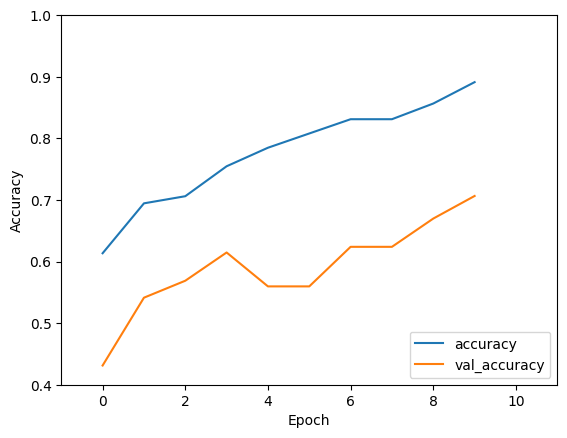

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  labels_test, verbose=2)

In [ ]:
print(test_acc)

0.7064220309257507


In [ ]:
predictions = model.predict(test_images)

4/4 [==============================] - 0s 10ms/step


In [ ]:
predictions[5]

array([1.1739626e-02, 8.7500125e-01, 2.7457078e-04, 1.1645489e-02,
       3.2682503e-03, 3.1580918e-02, 3.0140365e-03, 6.3475832e-02,
       2.2776643e-11, 3.5490872e-12], dtype=float32)

In [ ]:
np.argmax(predictions[1])

0

In [ ]:
len(labels_test)

109

In [ ]:
predictions[1]

array([9.6846086e-01, 1.0220336e-02, 8.8509927e-03, 1.0679481e-03,
       1.0266690e-02, 7.4981370e-05, 1.0517382e-03, 6.5595264e-06,
       4.1617109e-15, 1.7990642e-12], dtype=float32)

In [ ]:
x = str(np.argmax(predictions[1]))
y = str(labels_test[1])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 0 y la clase verdadera es: 0


In [ ]:
x = str(np.argmax(predictions[50]))
y = str(labels_test[50])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 3 y la clase verdadera es: 3


In [ ]:
x = str(np.argmax(predictions[40]))
y = str(labels_test[40])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 4 y la clase verdadera es: 4


In [ ]:
x = str(np.argmax(predictions[96]))
y = str(labels_test[96])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 6 y la clase verdadera es: 6


In [ ]:
x = str(np.argmax(predictions[61]))
y = str(labels_test[61])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 1 y la clase verdadera es: 4


In [ ]:
x = str(np.argmax(predictions[28]))
y = str(labels_test[28])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 3 y la clase verdadera es: 0


In [ ]:
x = str(np.argmax(predictions[33]))
y = str(labels_test[33])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 4 y la clase verdadera es: 5


In [ ]:
x = str(np.argmax(predictions[71]))
y = str(labels_test[71])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 3 y la clase verdadera es: 1


In [ ]:
x = str(np.argmax(predictions[82]))
y = str(labels_test[82])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 1 y la clase verdadera es: 1


In [ ]:
x = str(np.argmax(predictions[14]))
y = str(labels_test[14])

print("La red dice que la imagen es clase " + x + " y la clase verdadera es: " + y)

La red dice que la imagen es clase 4 y la clase verdadera es: 4
